
# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica. Área de curvas.

### Ejercicio 27.- Calcula el área de un pétalo de la curva (pétalo de cuatro hojas): $\rho=\cos(2\theta)$ usando el método del trapecio con $n=6$ intervalos. Estudia el error cometido.

SOLUCIÓN

Definimos $\theta$ como la variable "angulo".

In [1]:
angulo=var('angulo')

Ahora dibujamos nuestra curva pétalo de cuatro hojas. Observamos la forma de pétalo que tiene. 

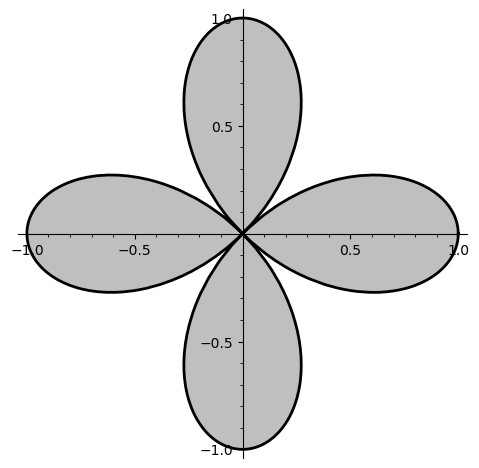

In [2]:
polar_plot(cos(2*angulo), (angulo,0,2*pi),color='black',thickness=2,fill=True)

Sabemos que el área delimitada por la curva $\rho=\rho(\theta)$ con $\theta \in [\theta_0,\theta_1]$, viene dada por la expresión
$$
A=\dfrac{1}{2}\int_{\theta_0}^{\theta_1} \rho(\theta)^2 d\theta.
$$

Tenemos que buscar la función que vamos a integrar y si observamos el enunciado del problema nos dice que hay que calcular
$$f(\theta)=\dfrac{\rho(\theta)^2}{2}=\dfrac{\cos^2(\theta)}{2}$$

In [3]:
f(angulo)=((cos(angulo))^2)/2
show(f)

angulo |--> 1/2*cos(angulo)^2

In [4]:
int(angulo)=integral(f,angulo)
show(int)

angulo |--> 1/4*angulo + 1/8*sin(2*angulo)

También se puede hacer el cálculo de esta integral a mano:
$$ \dfrac{1}{2} \int\cos^2(\theta) d\theta =\dfrac{1}{2} \int\dfrac{1+\cos(2\theta)}{2} d\theta=\dfrac{2\theta+\sin(2\theta)}{8}$$

Se puede calcular explícitamente ya que tenemos resuelta la integral.

In [5]:
int(2*pi)-int(0)

1/2*pi

In [6]:
numerical_integral(f,0,2*pi)[0] 

1.570796326794897

A mano se observa el mismo resultado:

$$A= \dfrac{2\theta+\sin(2\theta)}{8}|_{0}^{2\pi}= \dfrac{4\pi+\sin(4\pi)}{8}-\dfrac{0+\sin(0)}{8}= \dfrac{\pi}{2}$$

Observamos la fuerte simetría que tiene el pétalo de cuatro hojas. Por lo que si vamos a calcular el área podemos hacerlo en el intervalo $[0,\pi/4]$ y después multiplicar el resultado por $8$. O sea, calcular el área encerrada bajo medio pétalo como se ve en el gráfico.

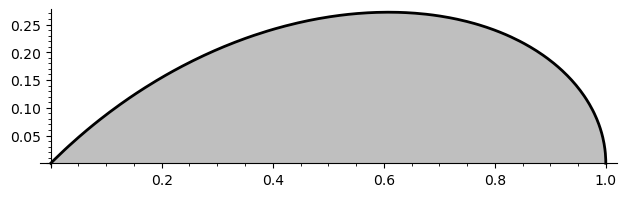

In [18]:
polar_plot(cos(2*angulo), (angulo,0,pi/4),color='black',thickness=2,fill=True)

Es decir, en vez de usar el Método del Trapecio para calcular la siguiente área:

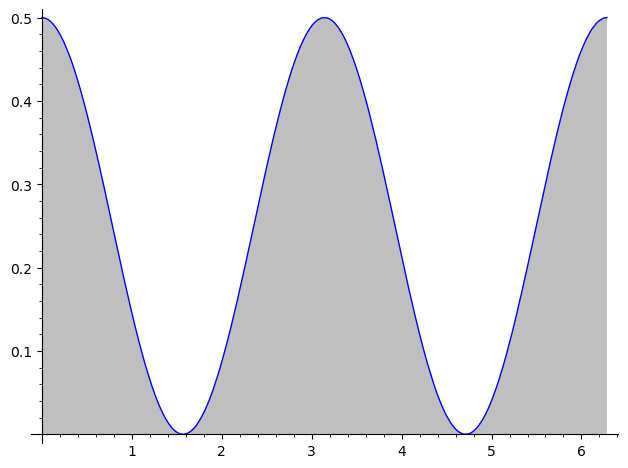

In [8]:
plot(f,0,2*pi,fill=True)

Se usa el mismo método pero a una octaba parte de la función. Después el resultado se multiplicará por $8$.

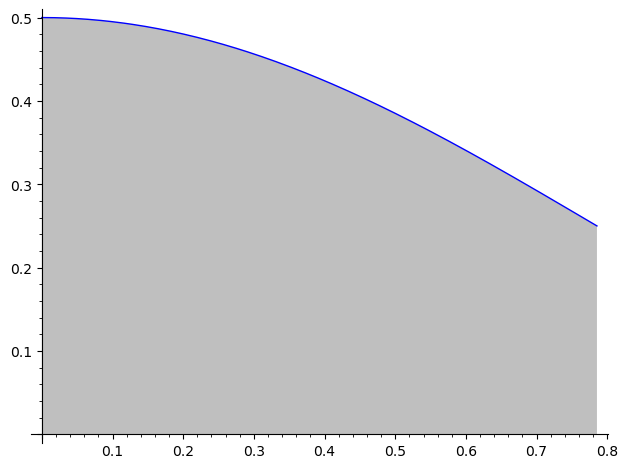

In [9]:
plot(f,0,pi/4,fill=True)

### Método del Trapecio 

En el método del Trapecio subdividimos el intervalo $[a,b]$ con los siguientes nodos: $x_k=a+k\cdot \frac{b-a}{n}$ para $k=0,1,\dots,n$.

La fórmula del Método del Trapecio nos aproxima la integral de la siguiente forma:
<p>$\displaystyle \int_a^b  {f(x)} \, dx \ \approx $  $\dfrac{b-a}{2n}\Bigl(f(a)+2f(x_1)+\dots+2f(x_{n-1})+f(b)\Bigr)$</p>
 
La cota del error absoluto cometido en el Método del Trapecio la podemos dar de la siguiente forma: 

Dada una constante M de forma que $|f''(x)|\leq M$ para todo $x\in [a,b]$. 
$$\displaystyle \left| {\rm Trapecio}_{n}(f)-\int_a^b f(x) \, dx\right| \leq \dfrac{(b-a)^3}{12\cdot n^2}\cdot M $$

In [10]:
a=0;
b=pi/4;
n=6;

In [11]:
X=[a+k*(b-a)/n for k in range(0,n+1)]
show(X)

[0, 1/24*pi, 1/12*pi, 1/8*pi, 1/6*pi, 5/24*pi, 1/4*pi]

In [12]:
trapecio=(b-a)/(2*n)*(f(a)+2*sum(f(X[k]) for k in range(1,n))+f(b))
trapecio.n()

0.320634776885882

Luego el área es éste resultado multiplicado por $8$

In [13]:
8*trapecio.n()

2.56507821508705

Para determinar $M$ calculamos $f''(x)$ y la representamos gráficamente en $[a,b]$

In [14]:
show(derivative(f(x),x,2))

-cos(x)^2 + sin(x)^2

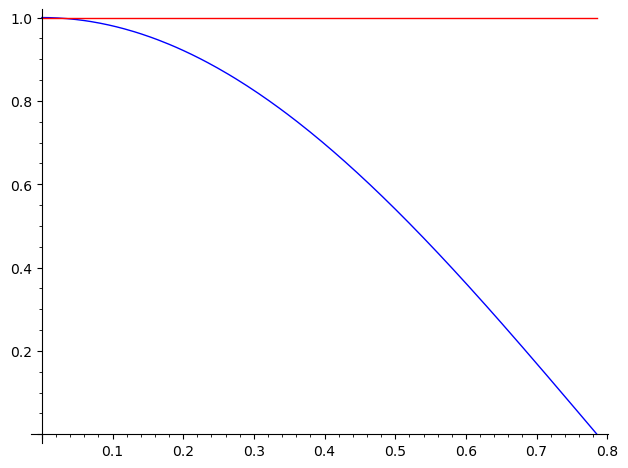

In [15]:
plot(abs(derivative(f(x),x,2)),a,b)+plot(1,a,b,color='red')

<p>En esta gráfica se observa que la constante $M=1$ cumple $|f''(x)|\leq M$ para todo $x\in [a,b]$.</p>
<p>Por tanto, una cota superior del error absoluto cometido es:</p>

In [16]:
M=1;
cota=(b-a)^3/(12*n^2)*M;
cota.n()

0.00112146544705946